In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
Date = pd.read_csv("Popular_Spotify_Songs.csv", encoding="ISO-8859-1")

In [253]:
bdm = Date.bpm
relasedYear = Date.released_year

mediaSteam = np.mean(relasedYear)
mediaBdm = np.mean(bdm)

medianaSteam = np.median(relasedYear)
medianaBdm = np.median(bdm)

modaSteam = relasedYear.mode()[0]
modaBdm = bdm.mode()[0]

desvioSteam = np.std(relasedYear)
desvioBdm = np.std(bdm)

In [254]:
print("Variável: released_year")
print("Média: {:.2f}".format(mediaSteam))
print("Mediana: {:.2f}".format(medianaSteam))
print("Moda: {:.2f}".format(modaSteam))
print("Desvio Padrão: {:.2f}".format(desvioSteam))

print("\nVariável: bdm")
print("Média: {:.2f}".format(mediaBdm))
print("Mediana: {:.2f}".format(medianaBdm))
print("Moda: {:.2f}".format(modaBdm))
print("Desvio Padrão: {:.2f}".format(desvioBdm))

Variável: released_year
Média: 2018.24
Mediana: 2022.00
Moda: 2022.00
Desvio Padrão: 11.11

Variável: bdm
Média: 122.54
Mediana: 121.00
Moda: 120.00
Desvio Padrão: 28.04


In [255]:
# Cálculo dos quartis
relasePlaylistQuarrtis = Date['in_spotify_playlists'].quantile([0.25, 0.5, 0.75])

# Cálculo dos percentis
relasePlaylistPercentis = Date['in_spotify_playlists'].quantile( [0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

In [256]:
# Print das variáveis de playlistApple
print("Playlist em dispositivos Apple:")
print(relasePlaylistQuarrtis)

# Print das variáveis de relaseDay
print("\nDias de lançamento:")
print(relasePlaylistPercentis)


Playlist em dispositivos Apple:
0.25     875.0
0.50    2224.0
0.75    5542.0
Name: in_spotify_playlists, dtype: float64

Dias de lançamento:
0.01      118.00
0.05      268.20
0.10      406.20
0.25      875.00
0.50     2224.00
0.75     5542.00
0.90    14088.20
0.95    22267.40
0.99    40649.12
Name: in_spotify_playlists, dtype: float64


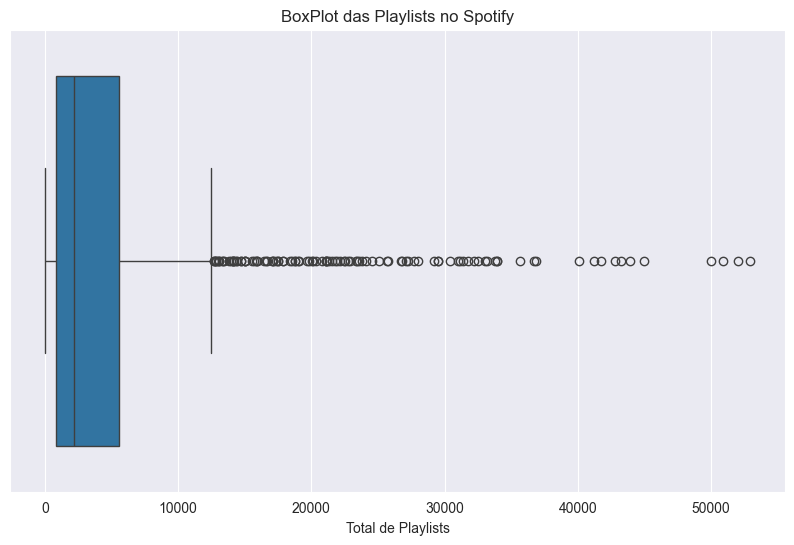

In [257]:
plt.figure(figsize=(10, 6))

# Criar o BoxPlot
sns.boxplot(x=Date['in_spotify_playlists'])

# Adicionar título e rótulos
plt.title('BoxPlot das Playlists no Spotify')
plt.xlabel('Total de Playlists')

# Mostrar o gráfico
plt.show()

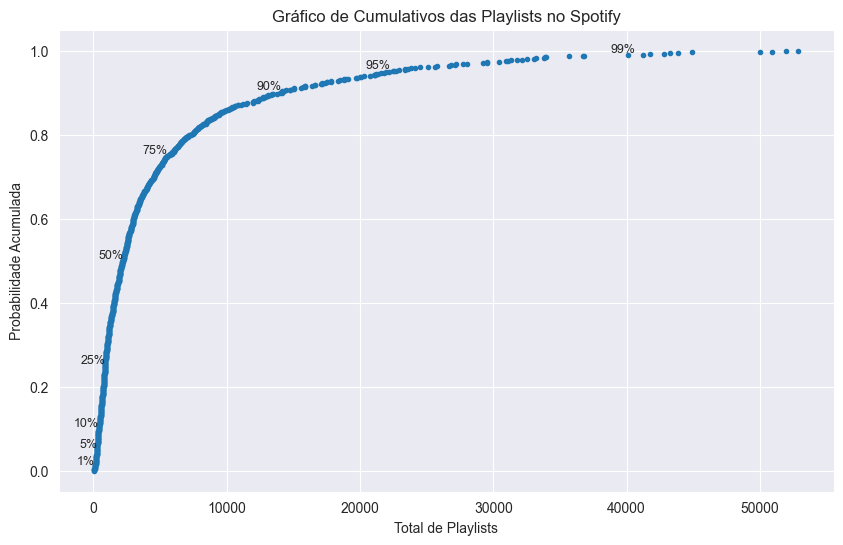

In [258]:
sorted_data = np.sort(Date['in_spotify_playlists'])

# Calcular a CDF
yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de Cumulativos
plt.plot(sorted_data, yvals, marker='.', linestyle='none')

# Adicionar título e rótulos
plt.title('Gráfico de Cumulativos das Playlists no Spotify')
plt.xlabel('Total de Playlists')
plt.ylabel('Probabilidade Acumulada')

# Adicionar linhas e rótulos para percentis específicos
percentis = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
percentil_values = Date['in_spotify_playlists'].quantile(percentis)

for perc, value in zip(percentis, percentil_values):
    plt.text(value, perc, f'{perc*100:.0f}%', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Mostrar o gráfico
plt.show()
plt.show()

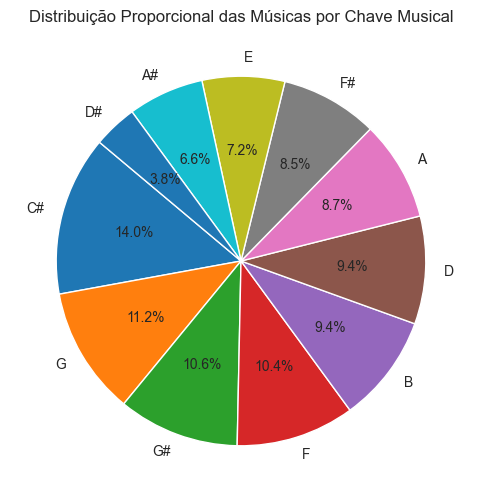

In [259]:
key_counts = Date['key'].value_counts()  

# Criar o gráfico de pizza
plt.figure(figsize=(10, 6))
key_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Proporcional das Músicas por Chave Musical')
plt.ylabel('')
plt.show()

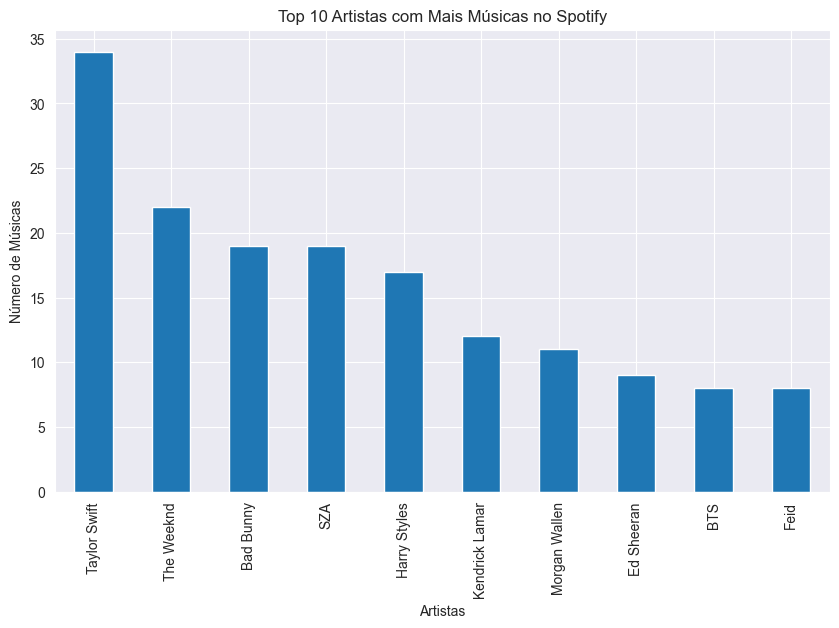

In [260]:
# Gráfico de Barras para Contagem de Músicas por Artista
artist_counts = Date['artist(s)_name'].value_counts().head(10)  # Top 10 artists

plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar')
plt.title('Top 10 Artistas com Mais Músicas no Spotify')
plt.xlabel('Artistas')
plt.ylabel('Número de Músicas')
plt.show()

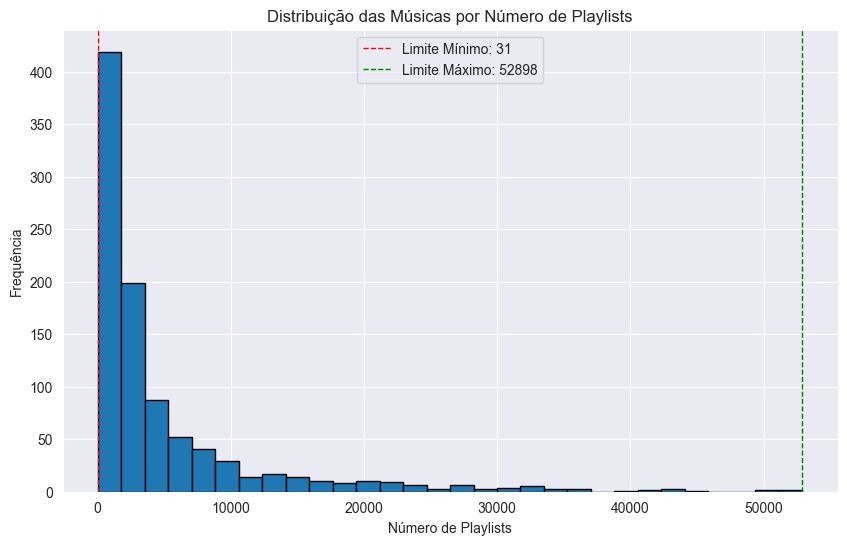

In [261]:
# Definir os limites máximo e mínimo
limite_min = Date['in_spotify_playlists'].min()
limite_max = Date['in_spotify_playlists'].max()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(Date['in_spotify_playlists'], bins=30, edgecolor='black')
plt.title('Distribuição das Músicas por Número de Playlists')
plt.xlabel('Número de Playlists')
plt.ylabel('Frequência')

# Adicionar linhas para os limites máximo e mínimo
plt.axvline(x=limite_min, color='r', linestyle='--', linewidth=1, label=f'Limite Mínimo: {limite_min}')
plt.axvline(x=limite_max, color='g', linestyle='--', linewidth=1, label=f'Limite Máximo: {limite_max}')
plt.legend()

plt.show()

In [262]:
# Probabilidade de uma música ser de um dos 10 artistas mais populares
prob_top_artists = Date['artist(s)_name'].isin(artist_counts.index).mean()
print(f'Probabilidade de uma música ser de um dos 10 artistas mais populares: {prob_top_artists:.2%}')

# Probabilidade de uma música ter entre 1000 e 5000 playlists
prob_between = ((Date['in_spotify_playlists'] >= 1000) & (Date['in_spotify_playlists'] <= 5000)).mean()
print(f'Probabilidade de uma música ter entre 1000 e 5000 playlists: {prob_between:.2%}')

# Probabilidade de uma música estar em uma das 10 chaves mais comuns
prob_top_keys = Date['key'].isin(key_counts.index).mean()
print(f'Probabilidade de uma música estar em uma das 10 chaves mais comuns: {prob_top_keys:.2%}')


Probabilidade de uma música ser de um dos 10 artistas mais populares: 16.68%
Probabilidade de uma música ter entre 1000 e 5000 playlists: 43.55%
Probabilidade de uma música estar em uma das 10 chaves mais comuns: 90.03%
